In [1]:
import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt 
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data.csv")
old_data = pd.read_csv("SpotifyFeatures.csv")

In [46]:
new = df.merge(old_data, left_on = 'id', right_on='track_id')
new.sample(15)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,...,energy_y,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,time_signature,valence_y
22227,0.179000,['Queen'],0.744,348227,0.502,0,1HmzAZUvhQLhLo2z3ocpZI,0.000172,5,0.1900,...,0.524,0.000130,F,0.2040,-7.627,Major,0.0362,112.329,4/4,0.644
64825,0.152000,['Jamestown Revival'],0.449,252960,0.786,0,14A2dKF4O0kQD0E5CCX3Jc,0.000000,4,0.0911,...,0.798,0.000000,A,0.0911,-5.379,Major,0.0389,161.813,4/4,0.459
42705,0.001330,['Beck'],0.624,202360,0.959,0,01MBhRpvFkbeRwAp7gcF2W,0.171000,11,0.1010,...,0.948,0.151000,A,0.0827,-6.169,Major,0.0978,95.785,4/4,0.665
32613,0.097900,['XTC'],0.577,219507,0.464,0,6nFdjV1Ko66O111x74K2kn,0.000001,7,0.1540,...,0.464,0.000001,G,0.1540,-7.943,Major,0.0240,90.557,4/4,0.346
33392,0.000034,['Screaming Trees'],0.192,246227,0.908,0,4EiLHuUSKTlaGmdR17J2tc,0.000162,7,0.2790,...,0.908,0.000162,G,0.2790,-9.127,Major,0.0720,201.254,4/4,0.481
15024,0.079100,['Kimbra'],0.763,241507,0.666,0,6cdslY3YKjh7pImxFhSBVG,0.000003,0,0.0733,...,0.666,0.000003,C,0.0733,-6.340,Major,0.0537,93.994,4/4,0.449
62563,0.012800,"['Duckwrth', 'Shaboozey']",0.728,171467,0.727,0,6V81K1OcvYgHEnCA6A2Qx9,0.000000,2,0.0882,...,0.727,0.000000,D,0.0882,-3.585,Major,0.2060,143.144,4/4,0.890
34357,0.342000,['Dixie Chicks'],0.542,217807,0.346,0,2qdVHdkLxKntNjPh3Ssz7s,0.000000,9,0.2830,...,0.346,0.000000,A,0.2830,-6.598,Major,0.0296,139.856,4/4,0.173
10397,0.086900,"[""Olivia O'Brien""]",0.788,208400,0.516,1,5648YJgWmV5TSYRdF6Cxl1,0.000000,9,0.1340,...,0.525,0.000000,A,0.1400,-8.669,Minor,0.0714,119.018,4/4,0.176
56426,0.401000,"['Ja Rule', 'Jennifer Lopez']",0.700,252933,0.631,0,4onVfPBjiLokGWsGRdPH7v,0.000000,2,0.1190,...,0.631,0.000000,D,0.1190,-6.085,Major,0.1070,83.403,4/4,0.558


In [5]:
df.popularity

0          0
1          0
2          0
3          0
4          1
          ..
169904    75
169905    64
169906    70
169907    70
169908    65
Name: popularity, Length: 169909, dtype: int64

In [47]:
new.shape

(70906, 37)

### <b>Data Description</b>
<font size=3>

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
    
artists: The name(s) of the artist(s) who perform the track.
    
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
    
duration_ms: A track's duration in milliseconds.
    
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
explicit: Whether the track was labeled as "explicit" due to content. 1 = Yes, 0 = No.
    
id: Track's unique identifier.
    
instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
    
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
    
loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. NOTE: Loudness is measured negatively here on purpose. This is because we are dealing with digital sound that a computer can listen to which is measured differently than what the human ear can listen to. This is sometimes why you will see negative numbers when you adjust the volume on your surround sound system. For more information on this, you can read this article: https://www.cablechick.com.au/blog/why-does-my-amplifier-use-negative-db-for-volume/
    
mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
    
name: Name of Track
    
popularity: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
    
release_date: Date of track's release.
    
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
    
valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
year: Year of track's release.
    


In [48]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [49]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [50]:
df.shape

(169909, 19)

In [51]:
df.sample(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
24526,0.98600,['Marika Papagkika'],0.351,257507,0.385,0,3QcK00paiZeoEGJPouH9Qc,0.037600,7,0.0893,-11.129,1,Pismatariko,0,1940-01-01,0.0450,69.241,0.461,1940
169452,0.06820,['Sturgill Simpson'],0.454,240640,0.366,0,5StrN0F4XI5e0BHP32THhl,0.247000,2,0.1230,-8.980,0,In Bloom,56,2016-04-15,0.0304,78.465,0.264,2016
30579,0.07510,['Petey Pablo'],0.762,235187,0.652,0,4zFyMSopXqcKWUbwVkC0vd,0.000000,5,0.3590,-4.490,0,Freek-a-Leek,40,2004,0.2250,104.965,0.664,2004
134939,0.05720,['Stick Figure'],0.736,327987,0.735,0,7mnk9W0umx7q4Vo4FjtOot,0.019000,2,0.2710,-6.448,1,Fire on the Horizon,59,2015-11-13,0.0386,143.002,0.692,2015
100828,0.78300,['Louis Armstrong'],0.567,266600,0.415,0,3JR6B9YqojWTUVEvT0bGjG,0.000525,5,0.0540,-9.895,0,I'm Crazy 'Bout My Baby,18,1955,0.0630,168.289,0.798,1955
76851,0.00184,['All That Remains'],0.476,216573,0.952,0,2Km4ZmdSvkd6l0bQLrr78A,0.000007,2,0.1920,-4.492,1,Forever In Your Hands,41,2008-09-16,0.0919,92.008,0.374,2008
52784,0.38100,['Aaron Tippin'],0.560,210280,0.342,0,39OECcMhNbtlpXGmq7U3Bu,0.000002,6,0.1340,-11.393,1,I Wonder How Far It Is Over You,28,1991-01-29,0.0275,85.915,0.254,1991
70914,0.98300,['Lata Mangeshkar'],0.638,163853,0.296,0,4g2oD6IXOqN1X8Y0FwAKkR,0.017200,5,0.1030,-12.278,1,Bhola Bhala Ri Mora Balma,0,1949-12-01,0.0644,125.517,0.944,1949
13293,0.00441,['Keith Sweat'],0.678,317533,0.455,0,5KuE5rTnmLzNvGqSpMGyMa,0.000000,9,0.2120,-13.664,0,Give Me What I Want,32,1991,0.0289,116.837,0.484,1991
137285,0.95500,['Kreider'],0.249,158224,0.643,0,0Ju4aUxZfPxKvy4EB90b3W,0.946000,5,0.4710,-7.698,1,Allegro 1,0,1950,0.0335,118.599,0.640,1950


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [53]:
df.drop(['id'], axis=1, inplace=True)

In [54]:
print("Unique Keys -> ", len(df.key.unique()))
df.key.unique()

Unique Keys ->  12


array([10,  8,  5,  1, 11,  6,  9,  7,  4,  2,  3,  0], dtype=int64)

In [55]:
print("Unique Artists -> ",len(df.artists.unique())) #artists are in list fix

Unique Artists ->  33375


In [56]:
df['popularity'] = df['popularity'].astype(float)
df['duration_ms'] = df['duration_ms'].astype(float)

In [57]:
continuous_columns = [col for col in df.columns if df[col].dtype == float or df[col].dtype == int]
categorical_columns = [col for col in df.columns if df[col].dtype == object]

In [58]:
print("Continuous Columns -> ",continuous_columns)
print("Categorical Columns -> ",categorical_columns)

Continuous Columns ->  ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']
Categorical Columns ->  ['artists', 'name', 'release_date']


## Exploratory Data Analysis

- check for bias (across genres, key, mode)
- dist of popularity
- Correlation Matrix
- popularity relation with features (regression)

### Checking data balance

In [59]:
# df1 = df.groupby('genre', as_index=False).size().sort_values(by='size',ascending=True)
df2 = df.groupby('key', as_index=False).size().sort_values(by='size',ascending=True)
df3 = df.groupby('mode', as_index=False).size().sort_values(by='size',ascending=True)

In [60]:
# plt.xticks(rotation=90)
# sns.barplot(x='genre', y='size', data=df1).set_title("Number of songs per genre", fontsize=17)

In [61]:
# df1.head(3)

Text(0.5, 1.0, 'Number of songs per key')

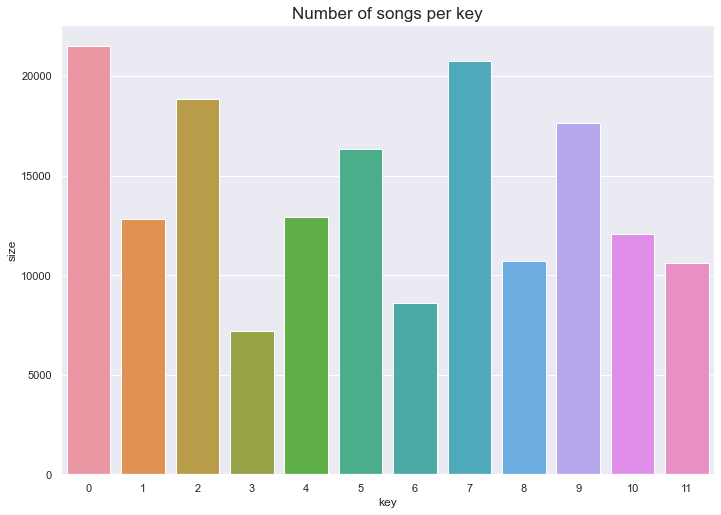

In [62]:
sns.barplot(x='key', y='size', data=df2).set_title("Number of songs per key", fontsize=17)

Text(0.5, 1.0, 'Number of songs per mode')

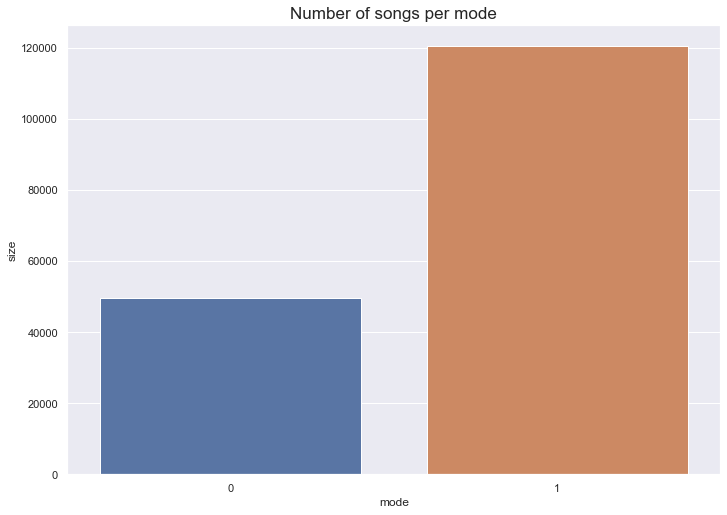

In [63]:
sns.barplot(x='mode', y='size', data=df3).set_title("Number of songs per mode", fontsize=17)

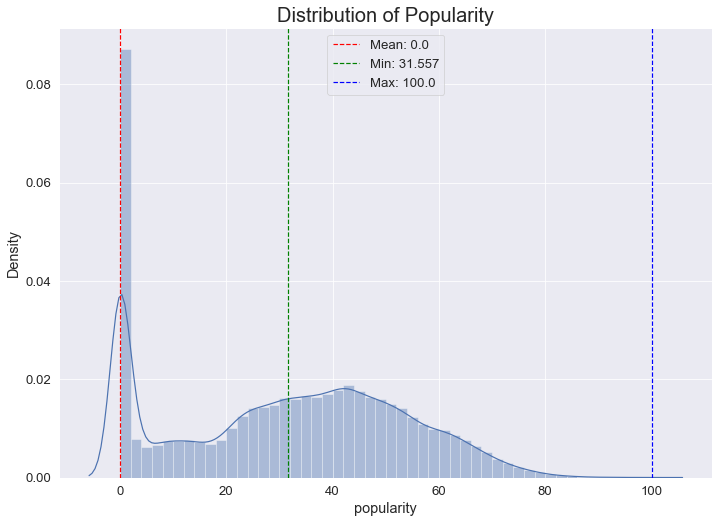

In [64]:
# Distribution of popularity score
sns.set_context("paper", font_scale=1.5)
sns.distplot(df.popularity).set_title("Distribution of Popularity", fontsize=20)
plt.axvline(df.popularity.min(), 0,1, label="Mean: " + str(df.popularity.min()), color = 'red', linestyle='dashed')
plt.axvline(df.popularity.mean(), 0,1, label="Min: " + str(round(df.popularity.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.popularity.max(), 0,1, label="Max: " + str(df.popularity.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [65]:
# df_by_artist = df.groupby('artist_name', as_index=False).size().sort_values(by='size',ascending=True)
# df_by_artist.sample(15)

In [66]:
df_by_tempo = df.groupby('tempo', as_index=False).size().sort_values(by='size',ascending=True)
df_by_tempo.sample(5)

,tempo,size
60566,140.372,1
70603,158.975,1
32831,106.851,2
80068,180.077,3
19710,91.118,4


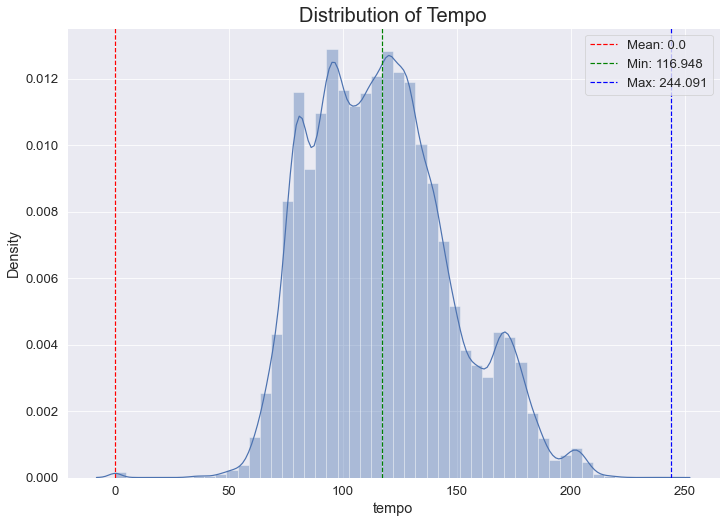

In [67]:
sns.distplot(df.tempo).set_title("Distribution of Tempo", fontsize=20)
plt.axvline(df.tempo.min(), 0,1, label="Mean: " + str(df.tempo.min()), color = 'red', linestyle='dashed')
plt.axvline(df.tempo.mean(), 0,1, label="Min: " + str(round(df.tempo.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.tempo.max(), 0,1, label="Max: " + str(df.tempo.max()), color = 'blue', linestyle='dashed')
plt.legend()

In [68]:
df_valence = df.groupby('valence', as_index=False).size().sort_values(by='size',ascending=True)
df_valence.sample(5)

,valence,size
767,0.0928,12
1644,0.9050,178
697,0.0857,11
50,0.0148,2
1021,0.2820,156


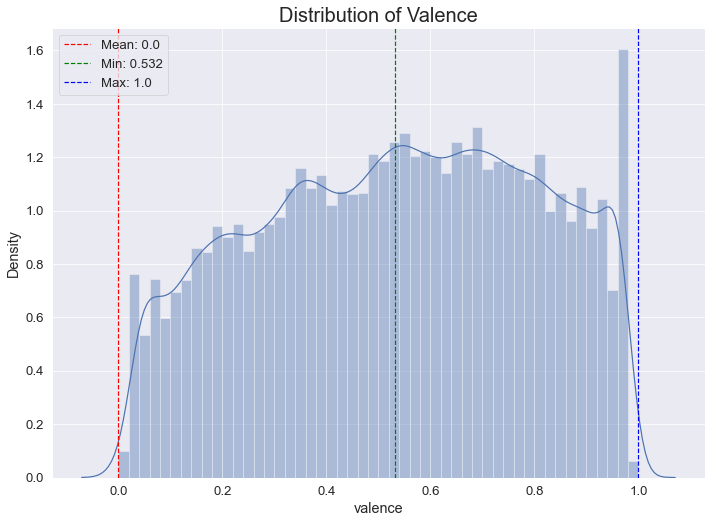

In [69]:
sns.distplot(df.valence).set_title("Distribution of Valence", fontsize=20)
plt.axvline(df.valence.min(), 0,1, label="Mean: " + str(df.valence.min()), color = 'red', linestyle='dashed')
plt.axvline(df.valence.mean(), 0,1, label="Min: " + str(round(df.valence.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.valence.max(), 0,1, label="Max: " + str(df.valence.max()), color = 'blue', linestyle='dashed')
plt.legend()

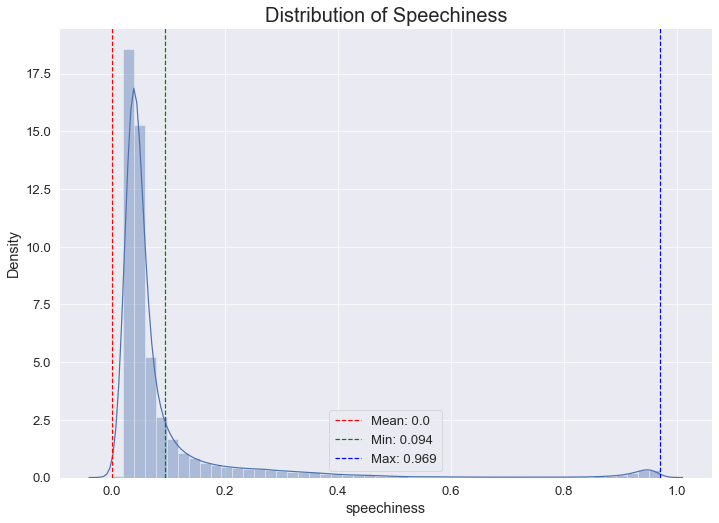

In [70]:
sns.distplot(df.speechiness).set_title("Distribution of Speechiness", fontsize=20)
plt.axvline(df.speechiness.min(), 0,1, label="Mean: " + str(df.speechiness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.speechiness.mean(), 0,1, label="Min: " + str(round(df.speechiness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.speechiness.max(), 0,1, label="Max: " + str(df.speechiness.max()), color = 'blue', linestyle='dashed')
plt.legend()

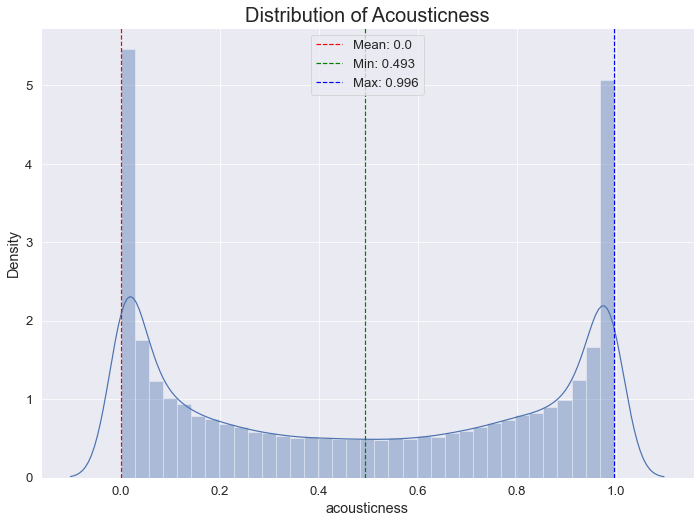

In [71]:
sns.distplot(df.acousticness).set_title("Distribution of Acousticness", fontsize=20)
plt.axvline(df.acousticness.min(), 0,1, label="Mean: " + str(df.acousticness.min()), color = 'red', linestyle='dashed')
plt.axvline(df.acousticness.mean(), 0,1, label="Min: " + str(round(df.acousticness.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.acousticness.max(), 0,1, label="Max: " + str(df.acousticness.max()), color = 'blue', linestyle='dashed')
plt.legend()

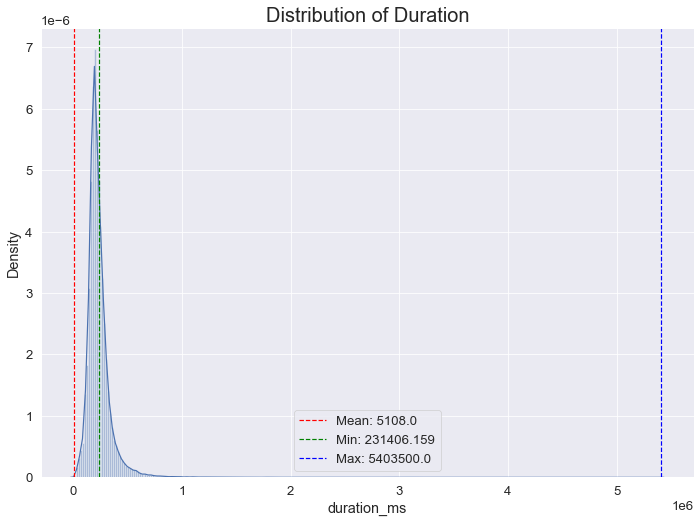

In [72]:
sns.distplot(df.duration_ms,bins=300).set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Mean: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Min: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

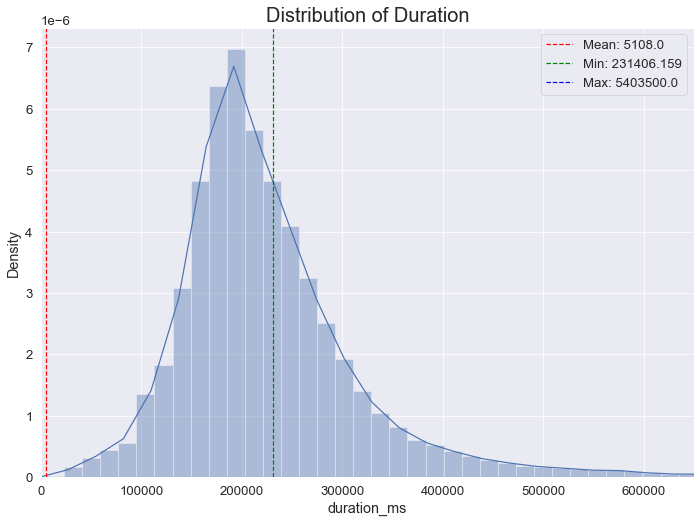

In [73]:
g = sns.distplot(df.duration_ms,bins=300)
g.set_xlim(0,650000)
g.set_title("Distribution of Duration", fontsize=20)
plt.axvline(df.duration_ms.min(), 0,1, label="Mean: " + str(df.duration_ms.min()), color = 'red', linestyle='dashed')
plt.axvline(df.duration_ms.mean(), 0,1, label="Min: " + str(round(df.duration_ms.mean(),3)), color = 'green', linestyle='dashed')
plt.axvline(df.duration_ms.max(), 0,1, label="Max: " + str(df.duration_ms.max()), color = 'blue', linestyle='dashed')
plt.legend()

## Regression

In [74]:
X1 = df[['acousticness', 'danceability', 
            'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

Y1 = df[['popularity']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:04:38   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398  

In [75]:
lr_stats = sm.OLS(Y1, X1).fit()

# print the coefficients
lr_stats.params
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:04:38   Log-Likelihood:            -7.1087e+05
No. Observations:              169909   AIC:                         1.422e+06
Df Residuals:                  169898   BIC:                         1.422e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.9024      0.398    102.851      0.000      40.123      41.682
acousticness       -23.2082      0.168   -138.233      0.000     -23.537     -22.879
danceability        27.0802      0.298     90.813      0.000      26.496      27.665
duration_ms       5.166e-07   3.29e-07      1.571      0.116   -1.28e-07    1.16e-06
energy              11.1166      0.318     35.013      0.000      10.494      11.739
instrumentalness    -7.0411      0.144    -48.797      0.000      -7.324      -6.758
liveness            -7.6301      0.228    -33.425      0.000      -8.078      -7.183
loudness             0.3234      0.012     26.790      0.000       0.300       0.347
speechiness        -25.7627      0.278    -92.590      0.000     -26.308     -25.217
tempo                0.0256      0.001     19.357      0.000       0.023       0.028
valence            -22.9175      0.197   -116.497      0.000     -23.303     -22.532
==============================================================================
Omnibus:                     7118.213   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8048.157
Skew:                           0.521   Prob(JB):                         0.00
Kurtosis:                       3.224   Cond. No.                     3.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
X2 = df[['acousticness', 'danceability']]#, 
            # 'energy', 'instrumentalness', 
            # 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
Y2 = df[['popularity']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                 4.704e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:04:38   Log-Likelihood:            -7.2560e+05
No. Observations:              169909   AIC:                         1.451e+06
Df Residuals:                  169906   BIC:                         1.451e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.3045      0.164    263.708   

In [77]:
X3 = df[['energy', 'instrumentalness']]
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 3.211e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:04:38   Log-Likelihood:            -7.3580e+05
No. Observations:              169909   AIC:                         1.472e+06
Df Residuals:                  169906   BIC:                         1.472e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.8058      0.105  

### Heat Maps

In [78]:
ht_df = df[['popularity','acousticness', 'danceability', 
            'duration_ms','energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

<AxesSubplot:>

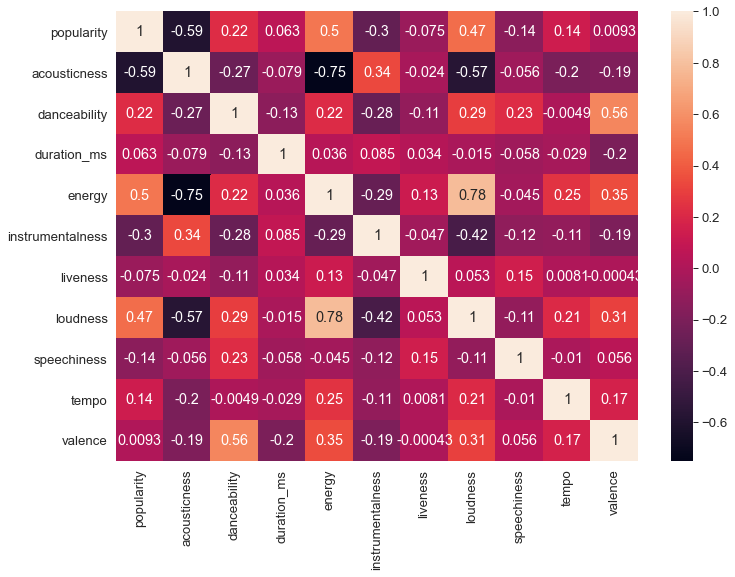

In [79]:
sns.heatmap(ht_df.corr(), annot=True)

### Label Encoder

In [80]:
lbc = LabelEncoder()

In [81]:
for col in categorical_columns:
    df[col] = lbc.fit_transform(df[col])
    print(lbc.classes_)

['["\'In The Heights\' Original Broadway Company", \'Mandy Gonzalez\']'
 '["\'In The Heights\' Original Broadway Company"]'
 '["\'Legally Blonde\' Ensemble", \'Michael Rupert\', \'Nikki Snelson\']'
 ... "['黃國隆']" "['黃蜀娟']" "['黑豹']"]
['!Que Vida! - Mono Version' '"40"' '"40" - Live' ... '행복 (Happiness)'
 "헤어지지 못하는 여자, 떠나가지 못하는 남자 Can't Breakup Girl, Can't Breakaway Boy (feat. 정인 Jung In)"
 '화려하지 않은 고백 Confession Is Not Flashy']
['1921' '1921-02-20' '1921-03-20' ... '2020-06-16' '2020-06-17'
 '2020-06-18']


In [82]:
df.sample(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
10403,0.928,3497,0.484,257133.0,0.1360,0,0.865000,5,0.2030,-20.255,1,84541,17.0,1240,0.0381,63.971,0.1220,1962
121083,0.469,5041,0.511,180680.0,0.5180,0,0.001160,2,0.2670,-7.944,1,53939,42.0,2032,0.0280,133.171,0.7620,1969
82478,0.155,15631,0.751,176627.0,0.6830,0,0.000008,1,0.0611,-5.771,1,95069,58.0,1533,0.0338,120.983,0.6310,1965
32459,0.990,23995,0.442,207600.0,0.1580,0,0.000001,11,0.1020,-12.336,0,66755,0.0,295,0.0574,94.690,0.2400,1940
43923,0.962,6664,0.381,77160.0,0.0184,0,0.968000,0,0.1370,-32.385,1,116300,24.0,3217,0.0365,111.545,0.0762,1979


In [83]:
X3 = df.drop(columns=['popularity'])
Y3 = df[['popularity']]
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 3.629e+04
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:04:42   Log-Likelihood:            -6.3281e+05
No. Observations:              169909   AIC:                         1.266e+06
Df Residuals:                  169891   BIC:                         1.266e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1275.0128      7.971  

In [85]:
# X4 = df.drop(columns=['popularity', 'track_name'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [87]:
# X4 = df.drop(columns=['popularity', 'track_name', 'duration_ms', 'tempo'])
# Y4 = df[['popularity']]
# X4 = sm.add_constant(X4)
# model4 = sm.OLS(Y4, X4).fit()
# print(model4.summary())

In [90]:
# sls = df.drop(columns=['name', 'duration_ms', 'tempo'])

In [91]:
# sns.heatmap(sls.corr(), annot=True)